In [1]:
from Uuat.train import gen
from Uuat.plots import unitary
from Uuat.scalers.expectation import Gaussian
import os
from pathlib import Path
import h5py
import matplotlib.pyplot as plt

folder = Path('./examples/generations/')
data = Path('./examples/clic/clic_8px_train.h5')

os.makedirs(folder, exist_ok = True)

with h5py.File(data) as f:
    clic_data = f['x'][:]

In [2]:
scaler = Gaussian()
scaler.fit(clic_data)
scaled_clic_data = scaler.encode(clic_data)

/home/samonaco/Projects/GenUuat/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [3]:
print(scaled_clic_data.shape)

(47682, 8)


MMD = 0.007300: 100%|██████████| 1000/1000 [00:47<00:00, 21.18it/s]


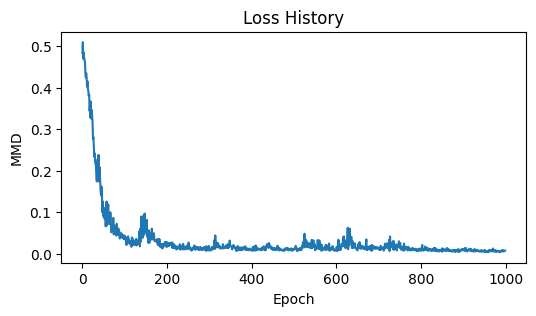

In [4]:
depth = 10
num_epochs = 1000
num_imgs = 500
lr = 0.05
#pp_Y, depth, num_imgs, num_epochs, lr = 0.1, p_sigma = [0.1, 0.25, 0.5, 0.75, 1], generate = False
params, params_history, loss_history, scaled_fakeclic_data = gen.train(scaled_clic_data, depth, num_imgs, num_epochs, lr, generate=True)

plt.figure(figsize=(6, 3))
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('MMD')
plt.plot(loss_history)
plt.savefig(folder / f'loss_clic_q{scaled_clic_data.shape[1]}_d{depth}.pdf')

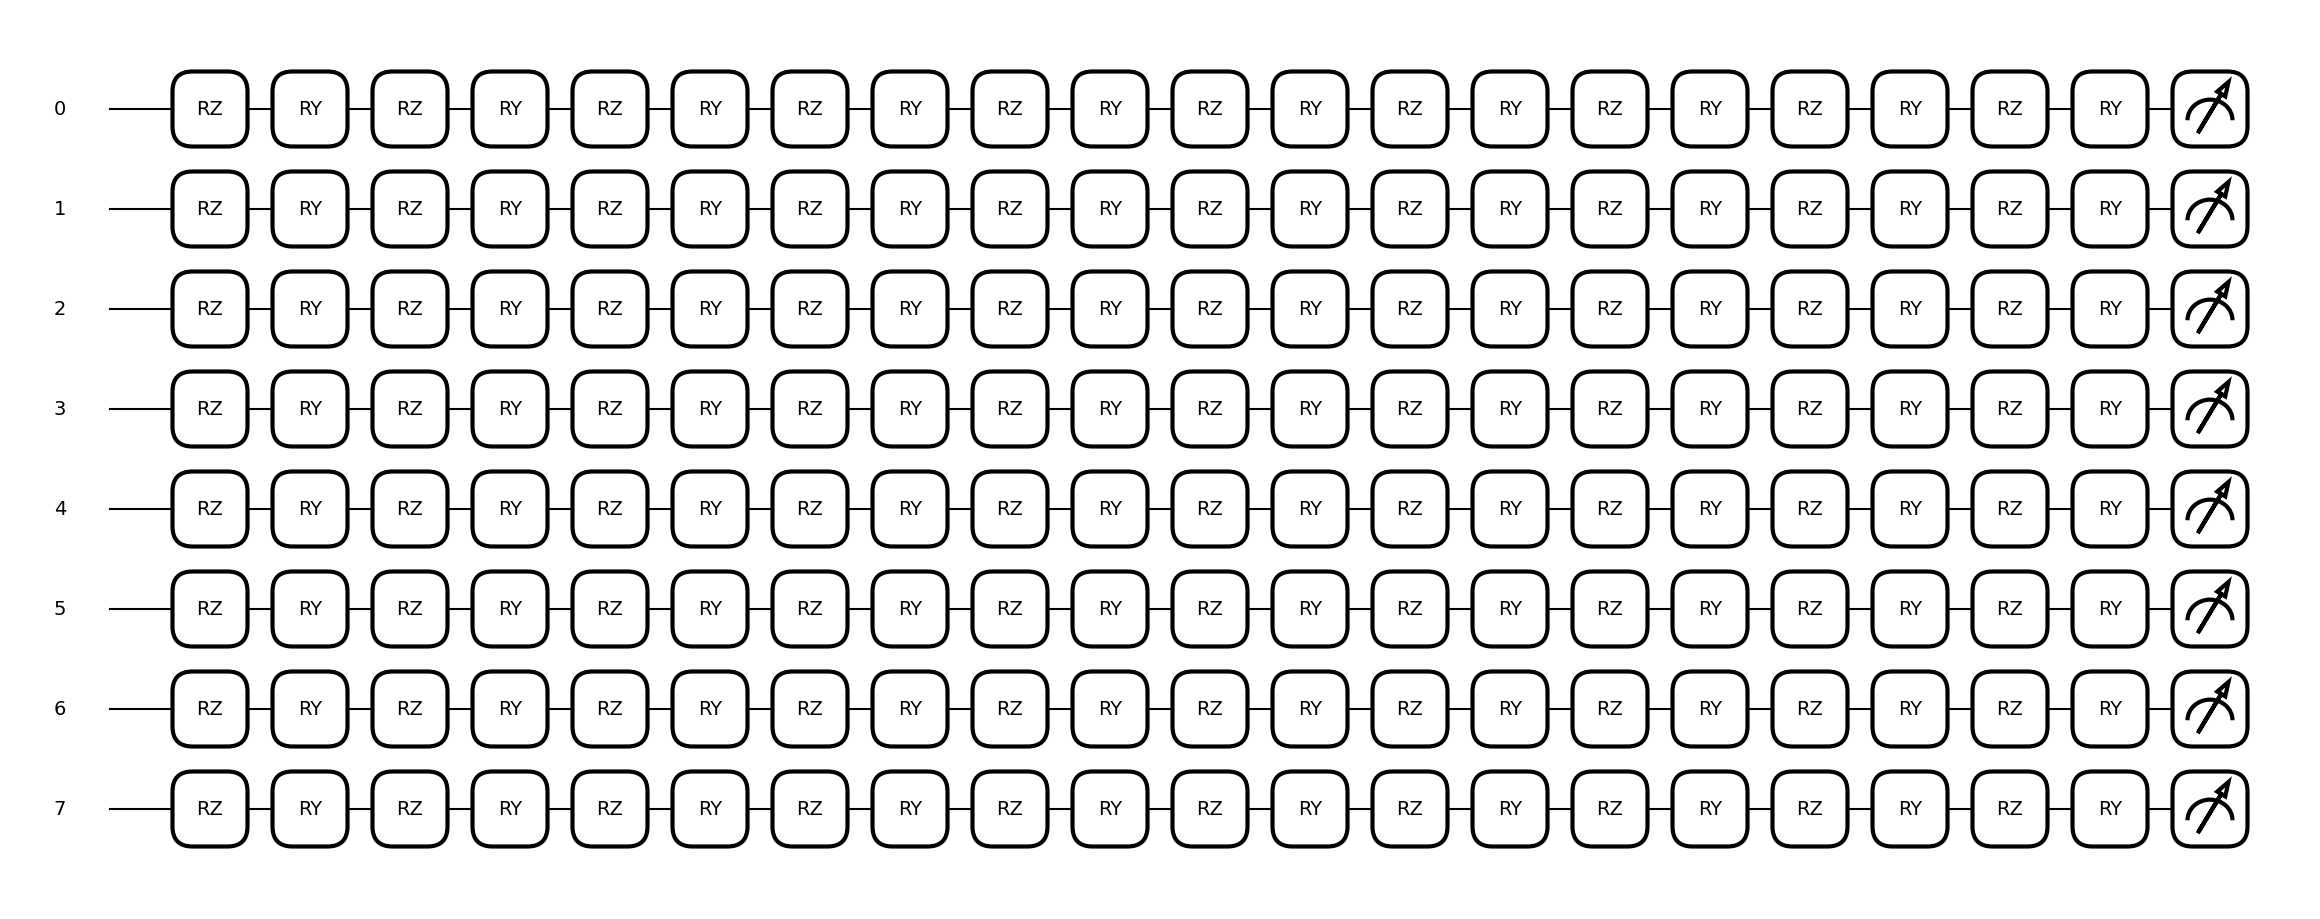

In [5]:
unitary.show_multi(scaled_clic_data.shape[1], depth, save=folder / f'multiUat_d{depth}_q{scaled_clic_data.shape[1]}.pdf')